# **Problem 1-DFT**

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#### Function for determining the DFT


def fft(x):
    N = len(x)
    w = np.e ** (-1j * 2 * np.pi /N)        ## W is called twiddle Factor
    fft = []
    for i in range(len(x)):
        fft.append(sum(x[j]*w**(j*i) for j in range(len(x))))
    return np.array(fft)


#### function for determining the DFT


def ifft(x):
    N = len(x)
    w = np.e ** (1j * 2 * np.pi / N)
    ifft = []
    for i in range(len(x)):
        ifft.append((1/N)*sum(x[j] * w ** (j * i) for j in range(len(x))))
    return np.array(ifft)

***DEFINING CIRCULAR CONVOLUTION***

In [ ]:
def circconv(a,b):
    return ifft(fft(a)*fft(b))

**Given Problem of circular convolution**

In [ ]:
x1 = [1,2,3,0,0,0,0]
x2 = [1,1,1,1,1,1,1]
print('Circ convolution between %s and %s\n' %(x1,x2) , abs(circconv(x1,x2)))

Circ convolution between [1, 2, 3, 0, 0, 0, 0] and [1, 1, 1, 1, 1, 1, 1]
 [6. 6. 6. 6. 6. 6. 6.]


**DFT of cosine signal**

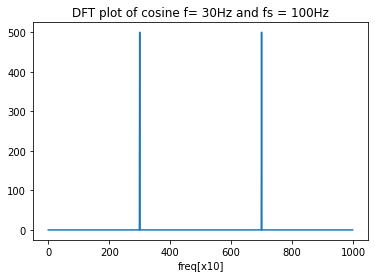

In [4]:
fs = 100
t = np.arange(0,10,1/fs)  ## signal sampled at 100 Hz for 10 seconds
sgnl = np.cos(2*np.pi*30*t)
fftsgnl = np.fft.fft(sgnl)
plt.plot(abs(fftsgnl))
plt.xlabel('freq[x10]')
plt.title('DFT plot of cosine f= 30Hz and fs = 100Hz')
plt.show()

*DFT of cosine gives two impulses at f and fs-f. Since here we Sampled the signal for 10 seconds we get the impulses at 300 and 700 HZ*

***Finding h from y and x from DFT and IDFT***

In [ ]:
x = [1, 3,  1,  5]   ## multiplication of DFT's is circular convolution of the given series in time domain
y = [7, 7 , 9, 3]
z = ifft((fft(y)/fft(x)))
print('The signal h(n) is \n' , abs(z))

The signal h(n) is 
 [0.6 0.4 1.4 1.4]


***Energy of the given signal***

In [ ]:
def x1(n):          #### let x1 be the given signal
  return (3/4)**n * (n>=0)
n = np.arange(0,50)
def energy(x):      #### Energy of a given signal
    return sum(abs(x)**2)
E1 = energy(x1(n))
E2 = energy(fft(x1(n)))
print('Energy of signal (3/4)^nu(n) for 50 samples \n' , E1 )
print('Energy of its DFT \n' , E2)
print('\nRatio of the two :' , round(E2/E1 ))

Energy of signal (3/4)^nu(n) for 50 samples 
 2.2857142857135524
Energy of its DFT 
 114.28571428567776

Ratio of the two : 50


*Hence we can see that ratio of the energy of the DFT and the energy of the given signal is the number of samples . This relation is called Parseval's Energy Theorem*

***DTFS coefficients***

In [ ]:
## DTFS coeffecients are very much related to the DFT 
def dtfcoeff(x):
    N = len(x)
    w = np.e ** (-1j * 2 * np.pi /N)
    fft = []
    for i in range(len(x)):
        fft.append(1/N*(sum(x[j]*(w**(j*i)) for j in range(len(x)))))    ##### DTFS coeffeicnts are realted by N factor with DFT of a signal 
    return np.array(fft)

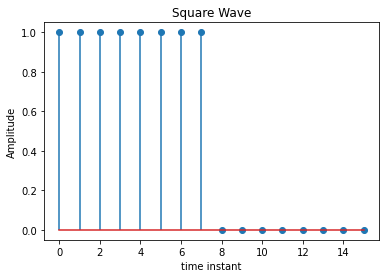

In [ ]:
def sqrwave(n):
    p = n/16
    z=[]
    for i in range(int(p)):
        z = z+[1 for i in range(8)] + [0 for i in range(8)]
    return z
plt.stem(sqrwave(16),use_line_collection= True)
plt.xlabel('time instant')
plt.ylabel('Amplitude')
plt.title('Square Wave')
plt.show()

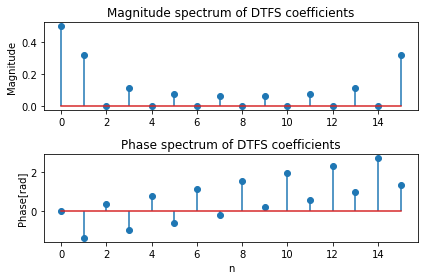

In [ ]:
dtfscoeff = dtfcoeff(sqrwave(16))
plt.subplot(211)
plt.stem(abs(dtfscoeff),use_line_collection= True)
plt.ylabel('Magnitude')
plt.title('Magnitude spectrum of DTFS coefficients')
plt.subplot(212)
plt.stem(np.angle(dtfscoeff),use_line_collection= True)
plt.xlabel('n')
plt.ylabel('Phase[rad]')
plt.title('Phase spectrum of DTFS coefficients')
plt.tight_layout()
plt.show()

# ***Problem 2***

***DISCRETE COSINE TRANSFORM***

In [ ]:
from scipy.fftpack import dct,idct
x2 = [8, 16, 24, 32, 40, 48, 56, 64]   ##  given signal
dct  = dct(x2,norm='ortho')
print('DCT of %s\n' %x2 , dct)

DCT of [8, 16, 24, 32, 40, 48, 56, 64]
 [101.82337649 -51.53858418   0.          -5.38763841   0.
  -1.60722323   0.          -0.40561858]


> *Lets calculate the energy of the signal from only the first 4 coeffecients 
of the signal*



In [ ]:
Energydct4 = energy(dct[:4])
print('Energy of the signal %s\n' %x2 , energy(np.array(x2)))
print('Energy calculated from only the first 4 coeff of DCT of the signal\n', energy(dct[:4]))

Energy of the signal [8, 16, 24, 32, 40, 48, 56, 64]
 13056
Energy calculated from only the first 4 coeff of DCT of the signal
 13053.252307055183




> *The Energy difference is very less concluding that the DCT makes the signal transform such that energy is confined in the lower order frequencies*



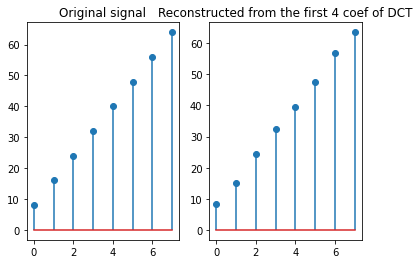

In [ ]:
#### Inverse DCT from the first 4 coeffecients
dct = list(dct[:4]) + [0 for i in range(len(x2)-4)]  #### padding zeros to the rest of the dct coeffecients
idct = idct(dct, norm='ortho')
plt.subplot(121)
plt.stem(x2,use_line_collection= True)
plt.title('Original signal')
plt.subplot(122)
plt.stem(idct,use_line_collection= True)
plt.title('Reconstructed from the first 4 coef of DCT')
plt.show()

In [ ]:
## Calculation of mean square error
error = np.sqrt(sum((idct - np.array(x2))**2))
print('Root mean square error between the original and the reconstructed signal\n' , error)

Root mean square error between the original and the reconstructed signal
 1.657616645916001


>***Lets repeat the process with DFT***



In [ ]:
print('Energy of the signal %s\n' %x2 , energy(np.array(x2)))
fft_x2 = np.fft.fft(x2)
print('Energy calculated from only the first 4 coeff of DFT of the signal\n', energy(fft_x2[:4]/8))

Energy of the signal [8, 16, 24, 32, 40, 48, 56, 64]
 13056
Energy calculated from only the first 4 coeff of DFT of the signal
 1456.0


> ***There is huge difference in the both energy calculated***



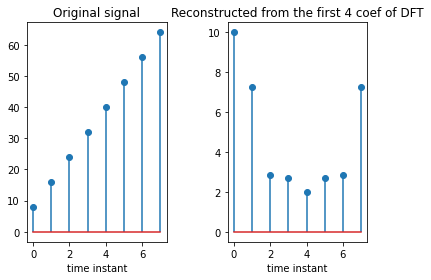

In [ ]:
## SIGNAL RECONSTRUCTION
x2_recon = np.fft.ifft(list(x2[:4]) + [0 for i in range(len(x2)-4)])    ####Reconstructed  x2 from the first 4 coef of DFT and other 4 padded 0
plt.subplot(121)
plt.stem(x2,use_line_collection= True)
plt.title('Original signal')
plt.xlabel('time instant')
plt.subplot(122)
plt.stem(abs(x2_recon),use_line_collection= True)
plt.title('Reconstructed from the first 4 coef of DFT')
plt.xlabel('time instant')
plt.tight_layout()
plt.show()

In [ ]:
error = np.sqrt(sum((abs(x2_recon) - np.array(x2))**2))
print('Root mean square error between the original and the reconstructed signal\n' , error)

Root mean square error between the original and the reconstructed signal
 104.53848833148815


> ***We see a big difference in the error calculated by the reconstruted signal from the DFT coeffecients because Unlike DCT the ENERGY is not concentrated in only the lower frequencies***

